# Solutions for Lab Sheet 1 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-1-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs):</strong><br>
    
After completing this Jupyter Notenook you should
    
<ul>
<li>be familiar with the concept of importing libraries to extend Python's functionality
</li>
    
<li>be able to generate, visualise (and playback) sine signals and audio (WAVE) files downloaded from the Internet
</li>
    
<li>have an initial underdtanding of plotting signals over discrete time index $k$ or continuous time $t$
</li>

<li>understand basic use of functions from the <code>Python</code> libraries 
    <ul>
    <li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html"><code>plot()</code></a>), 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>xlabel()</code></a>, 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>ylabel()</code></a>, 
        <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html"><code>legend()</code></a>,
        etc.)
    </li>
    <li><a href="https://numpy.org/doc/stable/index.html"><code>Numpy</code></a> for basic mathematical functions like 
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.arange.html"><code>arange()</code></a>, 
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html"><code>linspace()</code></a>, 
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.sin.html"><code>sin()</code></a>, 
        etc.
    </li>
    <li>interactive Python class <code>IPython.display</code> (in particular the playback function 
        <a href="https://ipython.org/ipython-doc/3/api/generated/IPython.display.html"><code>Audio()</code></a>)
    </li>
    </ul>
</li>
</ul>
</div>

In [29]:
# Let's do some necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling
import numpy as np               # math

## Task 1 - Generate a sine signal

The following code generates the sine signal

$$
x(t)= \sin(2 \pi f t).
$$

of length $0.25\,\mathrm{sec}$ with frequency $f=250\,\mathrm{Hz}$.

In [30]:
# Time specifications:
fs = 8000                        # samples per second
dt = 1/fs                        # seconds per sample
StopTime = 0.25                  # length in seconds
t = np.arange(0,StopTime,dt)     # time vector in seconds

# sine signal of frequency 250 Hz
f = 250                          # frequency in hertz
x = np.sin(2*np.pi*f*t)          # sine wave signal

The signal $x(t)$ can be diplayed using the `plot()` command from the library `matplotlib.pyplot`:

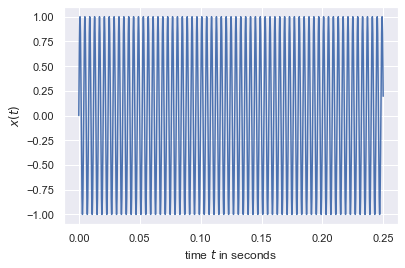

In [31]:
plt.plot(t,x)
plt.ylabel('$x(t)$')
plt.xlabel('time $t$ in seconds');

`IPython.display.Audio()` creates a player object which can be used to play back the signal. Since we want to take the variable `x` as input argument, we also have to provide the sampling freqyency $f_s$ (variable `rate=`).

In [35]:
import IPython.display as ipd
ipd.Audio(x/10,rate=fs)           # dividing the level by 10 ensures that playback is not too loud

The following code generates two sine signals 

\begin{eqnarray}
x_1(t)= \mbox{sin}(2 \pi f_1 t + \phi_1), \\
x_2(t)= \mbox{sin}(2 \pi f_2 t + \phi_2).
\end{eqnarray}    

with frequencies $f_1=60$ Hz and $f_2=200$ Hz. We increase the length of the signal a bit to $0.5\,\mathrm{sec}$.

In [46]:
StopTime = 0.5                   # length in seconds
t = np.arange(0,StopTime,dt)     # time vector in seconds

# sine signal of frequency 60 Hz
f1 = 60                          # frequency in hertz
phi1 = np.pi/2                   # phase (between 0 and 2 pi)
x1 = np.sin(2*np.pi*f1*t+phi1)   # sine wave signal

# sine signal of frequency 100 Hz
f2 = 200                         # frequency in hertz
phi2 = 0                         # phase (between 0 and 2 pi)
x2 = np.sin(2*np.pi*f2*t+phi2)   # sine wave signal

The signals $x_1[k]$ and $x_2[k]$ can again be diplayed using the `plot()` command from the library `matplotlib.pyplot`.

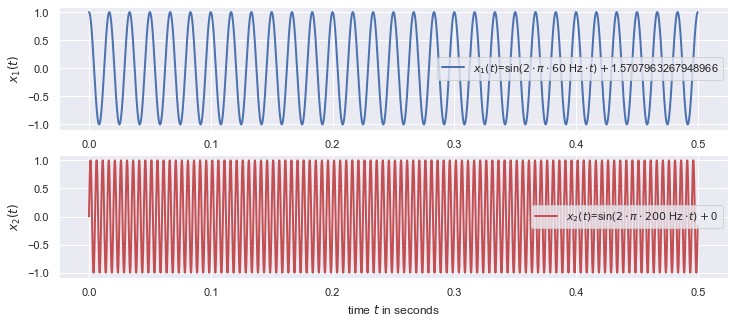

In [47]:
# Plot the signal over time:
fig = plt.figure(figsize=(12,5)) # create a figure of size 12x5 inch
plt.subplot(2,1,1)               # 1st subplot in an array of 2x1 subplots
plt.plot(t,x1,lw=2,label='$x_1(t)$=sin($2 \cdot \pi \cdot ' + str(f1) + '$ Hz $\cdot t)+ $' + str(phi1))
plt.ylabel('$x_1(t)$')           # we can use LaTeX notation, e.g. LaTeX math mode (using $...$)
plt.legend()                     # display the label information as a legend
plt.subplot(2,1,2)               # 1st subplot in an array of 2x1 subplots
plt.plot(t,x2,'r',lw=2, label='$x_2(t)$=sin($2 \cdot \pi \cdot ' + str(f2) + '$ Hz $\cdot t) + $' + str(phi2))
plt.ylabel('$x_2(t)$')
plt.legend()
plt.xlabel('time $t$ in seconds');

It can be seen from the plots above that a higher frequency leads to more oscillations per time. Furthermore it can be seen that a phase shift by $\pi/2$ which is $90^\circ$ turns a sine into a cosine.

Again we can listen to both signals. PLease note that only one `IPython.display.Audio()` object can be used in a Jupyter Notebook cell which is why two cells are used in the following.

In [44]:
ipd.Audio(x1/10,rate=fs)           # dividing the level by 10 ensures that playback is not too loud

In [45]:
ipd.Audio(x2/10,rate=fs)           # dividing the level by 10 ensures that playback is not too loud

The figures as well as the sound examples above should make the influence of the **frequency** of a sine signal clear. The **phase** difference is nothing else than a delay and therefore we do not perceive any difference for varying phase.

## Task 2 - Superposition of sine signals

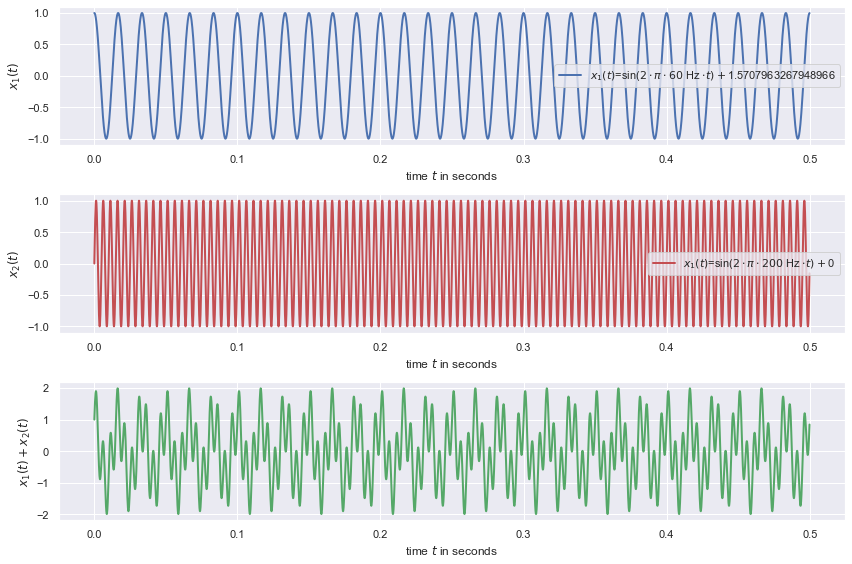

In [49]:
# add the two signals already created before
x3=x1+x2

# plot
fig = plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(t,x1,lw=2, label='$x_1(t)$=sin($2 \cdot \pi \cdot ' + str(f1) + '$ Hz $\cdot t)+ $' + str(phi1))
plt.ylabel('$x_1(t)$')
plt.xlabel('time $t$ in seconds');
plt.legend()
plt.subplot(3,1,2)
plt.plot(t,x2,color='r',lw=2, label='$x_1(t)$=sin($2 \cdot \pi \cdot ' + str(f2) + '$ Hz $\cdot t) + $' + str(phi2))
plt.ylabel('$x_2(t)$')
plt.xlabel('time $t$ in seconds');
plt.legend()
plt.subplot(3,1,3)
plt.plot(t,x3,lw=2,color='g',label='sin1+sin2')
plt.ylabel('$x_1(t)+x_2(t)$')
plt.xlabel('time $t$ in seconds');
plt.tight_layout() # this command ensures / attempts that all label text is well readable

When we listen to the signal $x_3(t)$ which is a superposition of $x_1(t)$ and $x_2(t)$ we can also hear both sine signals simultaneously.

In [51]:
ipd.Audio(x3/10,rate=fs)           # dividing the level by 10 ensures that playback is not too loud

## Task 3 - Handling Audio files

The `curl` command downloads the file `https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/speech.wav` to the hard disk. 

In [52]:
# download wave file
!curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/speech.wav -o speech.wav 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1812k  100 1812k    0     0  19.6M      0 --:--:-- --:--:-- --:--:-- 19.8M


The function `sf.read(...)` loads the content of the WAVE file to memory. Variable `s` conatins the speech signal vector $s[k]$ and variable `fs` contains the sampling rate, a.k.a. sampling frequency $f_s$, i.e. the number of discrete samples of a signal per second.

In [62]:
# remove the comment character (#) in case you need to install this library.
#!pip install soundfile

import soundfile as sf
s_file_name = 'speech.wav'
s,fs = sf.read(s_file_name)

print(s.shape) # this prints the dimension (length) of the vector s 
               # (not necessary in the following but to get an idea about the size (shape))

(928086,)


The signal $s[k]$ can again be diplayed using the `plot()` command from the library `matplotlib.pyplot`.

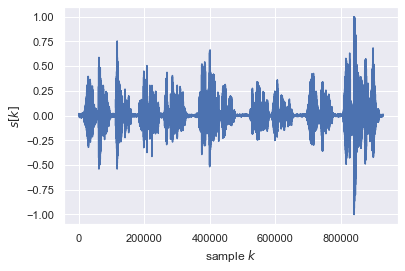

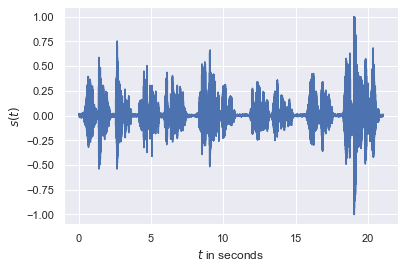

In [60]:
plt.figure(figsize=(6,4)) # create empty figure of size 6x4 inch
plt.plot(s)
plt.ylabel('$s[k]$');
plt.xlabel('sample $k$');

# optional we can create a matching time vector 
plt.figure(figsize=(6,4))
t=np.linspace(0,len(s)/fs,len(s))
plt.plot(t,s)
plt.xlabel('$t$ in seconds');
plt.ylabel('$s(t)$');

Above, two different visualisations are shown which only differ in terms of the *time* axis. The upper plot displays $s[k]$, i.e. the signal variable in discrete time domain over discrete time index $k$. The lower plot visualises the same signal but in the continuous signal $s(t)$. Please note: Of course the variable `s` is discrete in the computer, i.e. we actually display $s[k]$. But since the sampling points are close enought, it appears as if it would be a time continuous signal $s(t)$ in case a proper time axis and axis description is chosen.

`IPython.display.Audio()` creates a player object which can be used to play back the signal. Since we want to take the variable `s` as input argument, we also have to provide the sampling freqyency $f_s$ (variable `rate=`).

In [61]:
import IPython.display as ipd
ipd.Audio(s,rate=fs)

## Task 4 - Decibels (dB) - Plot signal with linear amplitude and in logarithmic amplitue 

The term [decibel](https://en.wikipedia.org/wiki/Decibel "Decibel on Wikipedia") (usually abbreviated by dB) is commonly used to discuss or visualise levels, aplitudes, powers, etc. in relation to acoustic systems and signals (as well as in various different domains beyond speech and audio).

A signal (e.g. $s[k]$) can be displayed 'normally' (i.e. with linear amplitude) or *in dB*. Since humans perceive sound *in dB* it makes sense to familiarise ourselves with how to display signals in dB.


To plot an amplitude signal $s[k]$ (not a power of a signal $s^2[k]$) we can use (\ref{eq:defDBamplitude}).

\begin{equation}
s_{\mathrm{dB}}[k] = 20 \cdot \mathrm{log}_{10}\left( \left| s[k] + \epsilon \right| \right) \label{eq:defDBamplitude}\tag{2}
\end{equation}

The variable $\epsilon$ is introduced above as "a very small number" to aboid $\mathrm{log}(0)$ which would be not defined. Since for real-valued numbers the logarithm is only defined for positive valued, the absolute value $|\cdot |$ is applied before calculating the logarithm.

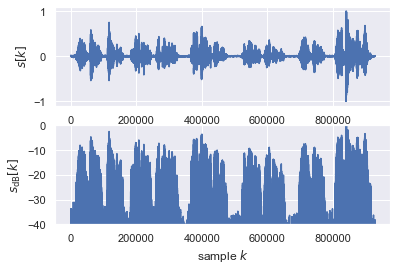

In [63]:
plt.subplot(2,1,1)
plt.plot(s)
plt.ylabel('$s[k]$');

epsilon = 1e-10 # very small number to avoid log10(0)
s_dB = 20*np.log10(np.abs(s)+epsilon)     

plt.subplot(2,1,2)
plt.plot(s_dB)
plt.ylabel('$s_{\mathrm{dB}}[k]$')
plt.xlabel('sample $k$')
plt.ylim((-40,0));                    # define which part of the y-axis should be 'zoomed in'

The two figures above visualise the same signal $s[k]$ in two different ways. Since visualisation in dB is quite common in the field of speech processing (one reason is that human perception is also happening in dB), you should become familiar with this way of visualising signals. 

If you are interested in (many) more details on dB scaling, [this page](https://www.animations.physics.unsw.edu.au/jw/dB.htm) provides more details.

## Copyright

This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). You may download, [clone](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) or [fork](https://docs.github.com/en/get-started/quickstart/fork-a-repo) it to your computer or private [GitHub](https://github.com/) account. 